In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from scipy.sparse import hstack as sp_hstack, csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
import warnings
warnings.filterwarnings('ignore')

# Importar función de validación
import sys
sys.path.append('..')
from validator import compute_metrics

In [2]:
train_dir = Path("../dataset_train.csv")
test_dir = Path("../dataset_test.csv")

df = pd.read_csv(train_dir)
print(f"Dataset size: {len(df)}")
df.head()

Dataset size: 8475


,movie_name,genre,description
0,Silent Hill,"Horror, Mystery","Rose, a desperate mother takes her adopted dau..."
1,Breaking the Waves,"Drama, Romance","In a small and conservative Scottish village, ..."
2,Wind Chill,"Drama, Horror, Thriller",Two college students share a ride home for the...
3,Godmothered,"Family, Fantasy, Comedy",A young and unskilled fairy godmother that ven...
4,Donkey Skin,"Fantasy, Comedy, Music, Romance",A fairy godmother helps a princess disguise he...


In [3]:
df["text"] = df["movie_name"].fillna("") + " [SEP] " + df["description"].fillna("")
y_list = df["genre"].apply(lambda s: [g.strip() for g in str(s).split(",") if g.strip()])

mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(y_list)

print(f"Number of labels: {len(mlb.classes_)}")
print(f"Label distribution shape: {Y.shape}")

Number of labels: 18
Label distribution shape: (8475, 18)


In [4]:
X_tr, X_va, y_tr, y_va = train_test_split(df["text"], Y, test_size=0.1, random_state=42)
print(f"Original - Training: {len(X_tr)}, Validation: {len(X_va)}")

Original - Training: 7627, Validation: 848


✓ Saved: genre_distribution_bars.png


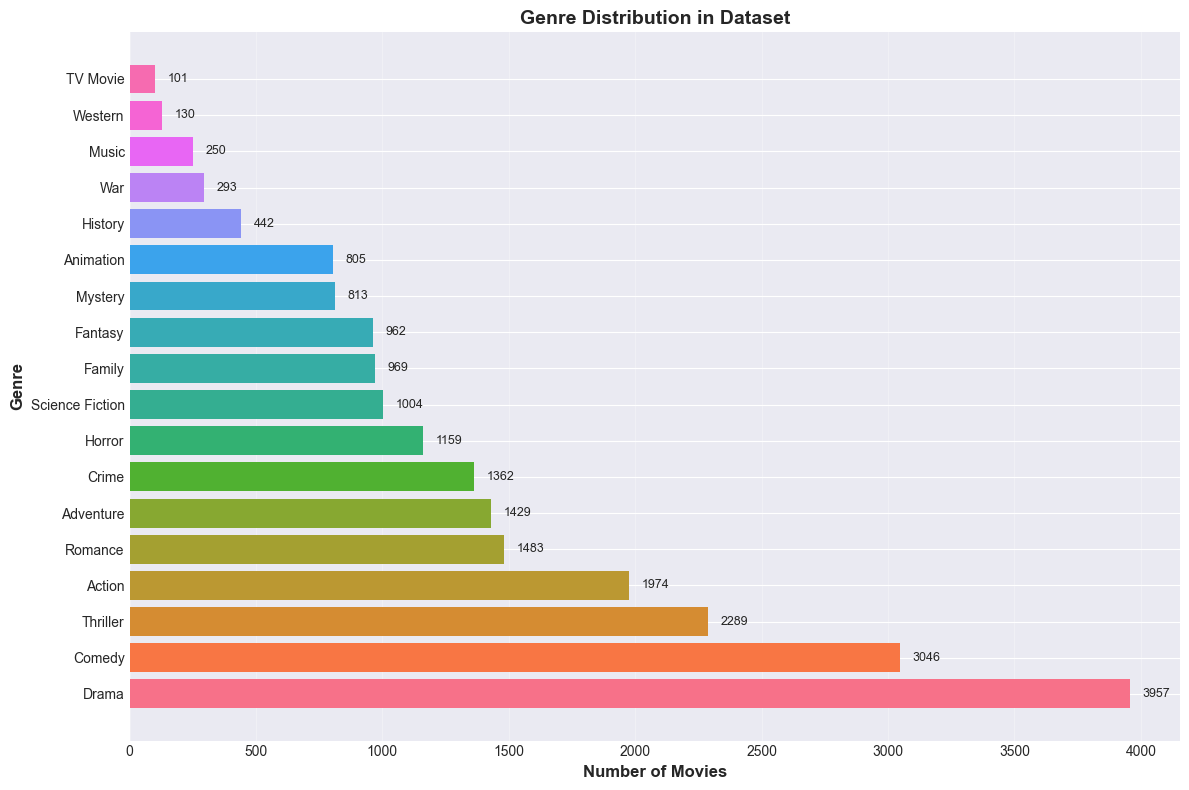

✓ Saved: genre_distribution_pie.png


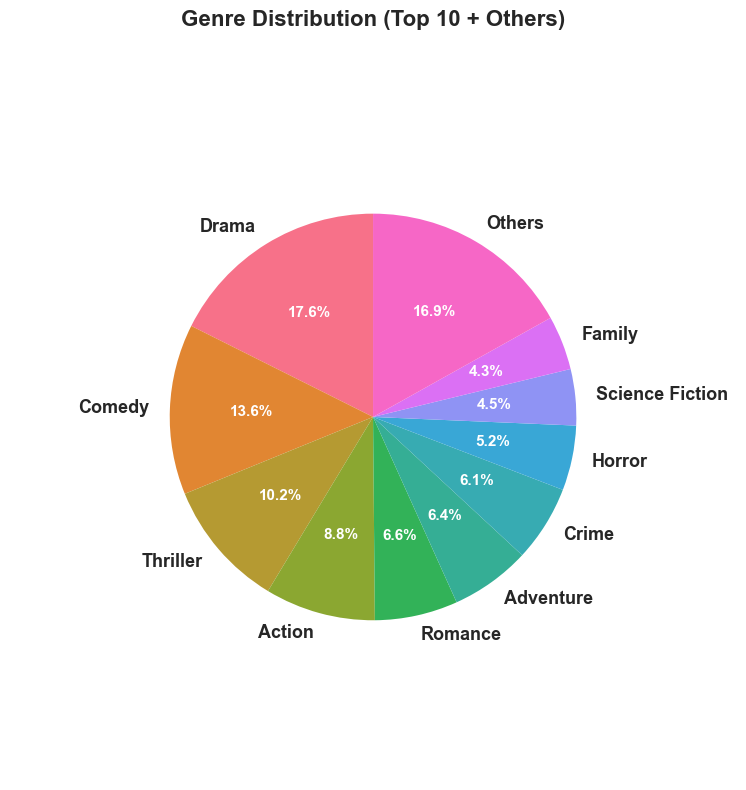


GENRE DISTRIBUTION STATISTICS

Total number of genres: 18
Total genre annotations: 22468
Average genres per movie: 2.65

Top 5 most common genres:
  1. Drama: 3957 (46.7% of movies)
  2. Comedy: 3046 (35.9% of movies)
  3. Thriller: 2289 (27.0% of movies)
  4. Action: 1974 (23.3% of movies)
  5. Romance: 1483 (17.5% of movies)

Top 5 least common genres:
  1. History: 442 (5.2% of movies)
  2. War: 293 (3.5% of movies)
  3. Music: 250 (2.9% of movies)
  4. Western: 130 (1.5% of movies)
  5. TV Movie: 101 (1.2% of movies)


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Calcular la frecuencia de cada género
genre_counts = Y.sum(axis=0)
genre_names = mlb.classes_

# Crear DataFrame para facilitar la visualización
genre_df = pd.DataFrame({
    'Genre': genre_names,
    'Count': genre_counts
}).sort_values('Count', ascending=False)

# ============================================
# GRÁFICA 1: Distribución por barras
# ============================================
fig1, ax1 = plt.subplots(figsize=(12, 8))

colors = sns.color_palette("husl", len(genre_df))
ax1.barh(genre_df['Genre'], genre_df['Count'], color=colors)
ax1.set_xlabel('Number of Movies', fontsize=12, fontweight='bold')
ax1.set_ylabel('Genre', fontsize=12, fontweight='bold')
ax1.set_title('Genre Distribution in Dataset', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Añadir valores en las barras
for i, (genre, count) in enumerate(zip(genre_df['Genre'], genre_df['Count'])):
    ax1.text(count + 50, i, f'{int(count)}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('genre_distribution_bars.png', dpi=300, bbox_inches='tight')
print("✓ Saved: genre_distribution_bars.png")
plt.show()

# ============================================
# GRÁFICA 2: Gráfica de pastel (top 10 + others)
# ============================================
fig2, ax2 = plt.subplots(figsize=(8, 8))

top_n = 10
top_genres = genre_df.head(top_n)
others_count = genre_df.iloc[top_n:]['Count'].sum()

# Preparar datos para el pie chart
pie_data = pd.concat([
    top_genres,
    pd.DataFrame({'Genre': ['Others'], 'Count': [others_count]})
])

colors_pie = sns.color_palette("husl", len(pie_data))
wedges, texts, autotexts = ax2.pie(
    pie_data['Count'], 
    labels=pie_data['Genre'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors_pie,
    textprops={'fontsize': 13, 'fontweight': 'bold'},
    radius=0.7
)

# Mejorar legibilidad de los porcentajes
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

ax2.set_title(f'Genre Distribution (Top {top_n} + Others)', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('genre_distribution_pie.png', dpi=300, bbox_inches='tight')
print("✓ Saved: genre_distribution_pie.png")
plt.show()

# ============================================
# Estadísticas adicionales
# ============================================
print("\n" + "="*60)
print("GENRE DISTRIBUTION STATISTICS")
print("="*60)
print(f"\nTotal number of genres: {len(genre_names)}")
print(f"Total genre annotations: {int(genre_counts.sum())}")
print(f"Average genres per movie: {genre_counts.sum() / len(df):.2f}")
print(f"\nTop 5 most common genres:")
for i, (genre, count) in enumerate(zip(genre_df['Genre'].head(5), genre_df['Count'].head(5)), 1):
    print(f"  {i}. {genre}: {int(count)} ({count/len(df)*100:.1f}% of movies)")
print(f"\nTop 5 least common genres:")
for i, (genre, count) in enumerate(zip(genre_df['Genre'].tail(5), genre_df['Count'].tail(5)), 1):
    print(f"  {i}. {genre}: {int(count)} ({count/len(df)*100:.1f}% of movies)")
print("="*60)